In [2]:
import glob
from bokeh.io import output_notebook
from bokeh.charts import Histogram,Line,Bar,show
from matplotlib import pyplot as plot
import pandas as pd
import pickle
import itertools

output_notebook()
%matplotlib inline

Loading BokehJS ...

### Evaluations distribution

In [151]:
filenames = glob.glob("../data/300_convo/*")
categories = ["overall", "start", "interupt", "engaing", "return"]

df = pd.DataFrame(data=np.zeros((len(filenames), len(categories))), 
                  index=[i.split("/")[-1] for i in filenames], columns=categories)

for filename in filenames:
    f = open(filename, "r", errors="replace")
    index = filename.split("/")[-1]
    ratings = f.readlines()[-1].split(",")[:-1]
    for i in ratings:
        category, score = i.split("=")
        df.set_value(index, category, int(score))

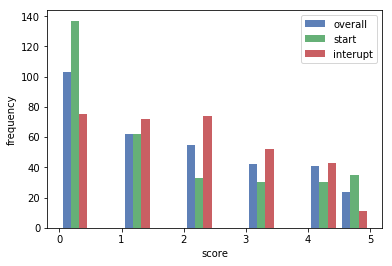

In [169]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,4))
fig = plt.hist([list(df["overall"]), list(df["start"]), list(df["interupt"])], alpha=0.9)
plt.legend(["overall", "start", "interupt"])
plt.xlabel("score")
plt.ylabel("frequency")

### How many user participated in data collection?

In [15]:
filenames = glob.glob("../data/300_convo/*")
users = {}
for filename in filenames:
    user_name = filename.split("/")[-1].split("_")[0]
    user_name = ''.join([i for i in user_name if not i.isdigit()])
    if user_name not in users.keys():
        users[user_name] = [filename]
    else:
        users[user_name].append(filename)
print("number of people participating in data collection:", len(users.keys())-2)
print("their names", list(users.keys()))

number of people participating in data collection: 17
their names ['abc', 'alec', 'bad.txt', 'eugene', 'good.txt', 'hk', 'jay', 'jie', 'molly', 'nehal', 'prachi', 'shailee', 'si chang', 'si', 'siddhi', 'vi', 'vidya', 'wei', 'yue cao']


### Do different people rate the dialogues differently?

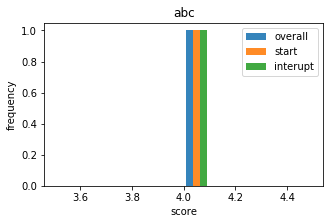

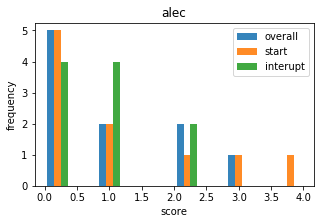

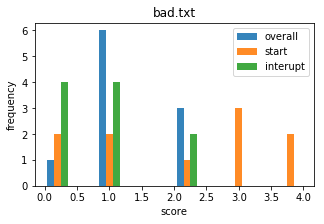

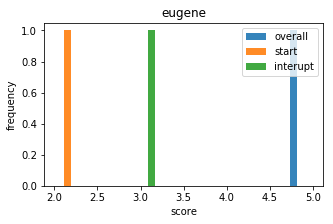

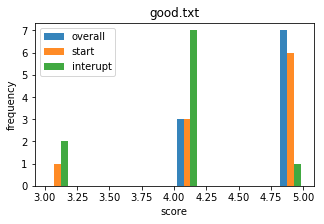

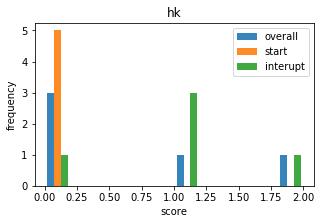

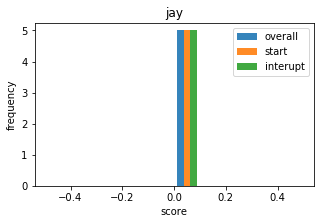

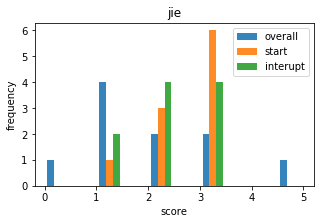

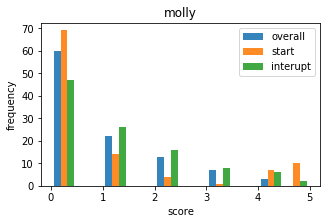

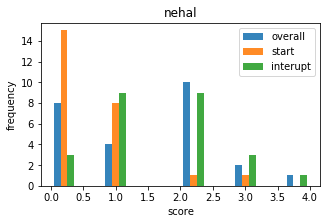

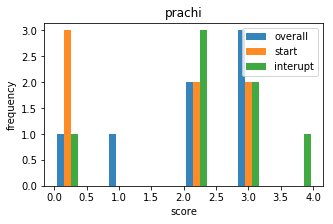

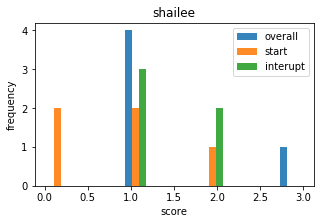

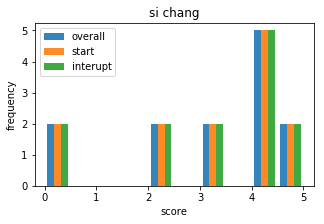

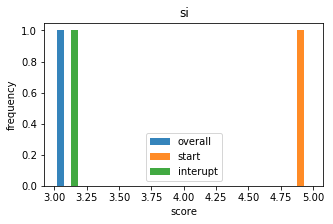

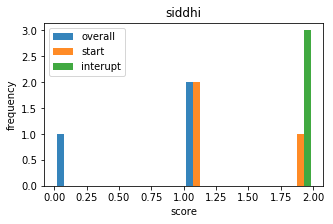

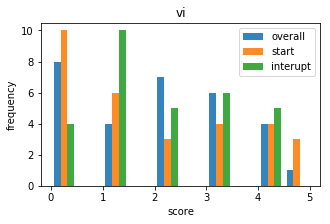

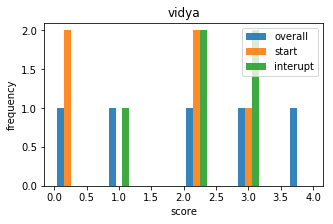

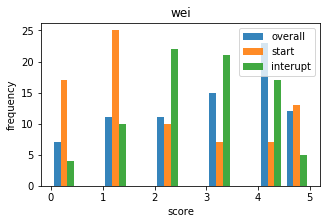

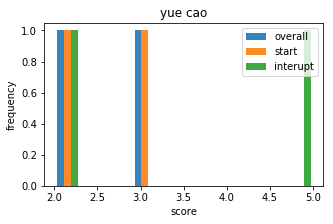

In [20]:
categories = ["overall", "start", "interupt", "engaing", "return"]

for user, filenames in users.items():
    df = pd.DataFrame(data=np.zeros((len(filenames), len(categories))), 
                      index=[i.split("/")[-1] for i in filenames], columns=categories)
    for filename in filenames:
        f = open(filename, "r", errors="replace")
        index = filename.split("/")[-1]
        ratings = f.readlines()[-1].split(",")[:-1]
        for i in ratings:
            category, score = i.split("=")
            df.set_value(index, category, int(score))
    plt.figure(figsize=(5,3))
    fig = plt.hist([list(df["overall"]), list(df["start"]), list(df["interupt"])], alpha=0.9)
    plt.legend(["overall", "start", "interupt"], loc="best")
    plt.xlabel("score")
    plt.ylabel("frequency")
    plt.title(user)
plt.show()

### How many states are explored in the 300 conversations?
possible states: 2^4 + 1 = 17  
possible states-action pairs: 17\*6 = 102

In [30]:
parsed_dialogs = pickle.load(open("../data/parsed_data.pkl", "rb"))
actions = ['question', 'elaborate', 'opinion', 'affirmative', 'negative', 'neutral']
columns = ["Question", "Sentiment", "Subjectivity", "Length", "Action"]

In [33]:
# intialize all combination of state/action pairs to count 0
df_count = pd.DataFrame(
    data= list(itertools.product(["0","1"],["0","1"],["0","1"],["0","1"], actions)), columns=columns)
df_count["Count"] = [0] * len(df_count.index)

# count state/action pair occurence
for filename, df_states in parsed_dialogs.items():
    for index, row in df_states.iterrows():
        r_index = df_count[(df_count.Question==row.Question)&
                           (df_count.Sentiment==row.Sentiment)&
                           (df_count.Subjectivity==row.Subjectivity)&
                           (df_count.Length==row.Length)&
                           (df_count.Action==row.Action)].index
        df_count.set_value(r_index, "Count", df_count.loc[r_index]["Count"]+1)

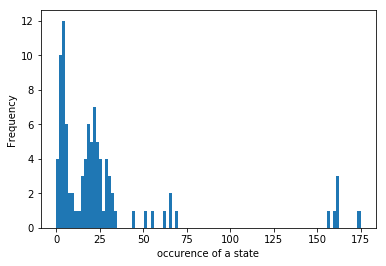

In [40]:
df_count["Count"].plot(kind="hist",bins=100)
plt.xlabel("occurence of a state")

In [34]:
df_count.sort_values(by="Count", ascending=False)

,Question,Sentiment,Subjectivity,Length,Action,Count
2,0,0,0,0,opinion,175
0,0,0,0,0,question,162
5,0,0,0,0,neutral,161
1,0,0,0,0,elaborate,161
4,0,0,0,0,negative,160
3,0,0,0,0,affirmative,156
11,0,0,0,1,neutral,69
6,0,0,0,1,question,65
10,0,0,0,1,negative,65
8,0,0,0,1,opinion,62
